data preparation untuk menyiapkan data untuk clustering 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from google.colab import files
uploaded = files.upload()

Saving fifa20.csv to fifa20.csv


In [3]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['fifa20.csv']))
dataset.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
#melakukan pemotongan data
data = pd.DataFrame(dataset, columns = ["sofifa_id", "age", "height_cm", "weight_kg","overall","potential","skill_moves"])
data

,sofifa_id,age,height_cm,weight_kg,overall,potential,skill_moves
0,158023,32,170,72,94,94,4
1,20801,34,187,83,93,93,5
2,190871,27,175,68,92,92,5
3,200389,26,188,87,91,93,1
4,183277,28,175,74,91,91,4
...,...,...,...,...,...,...,...
18273,245006,22,186,79,48,56,2
18274,250995,22,177,66,48,56,2
18275,252332,19,186,75,48,56,2
18276,251110,18,185,74,48,54,2


In [5]:
#cek missing value
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,skill_moves
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.368038
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,0.765038
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,2.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,2.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,3.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,5.000000


mengeksplorasi data mana yang berkorelasi, berhubungann. menggunakan seaborn lalu di plot.

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

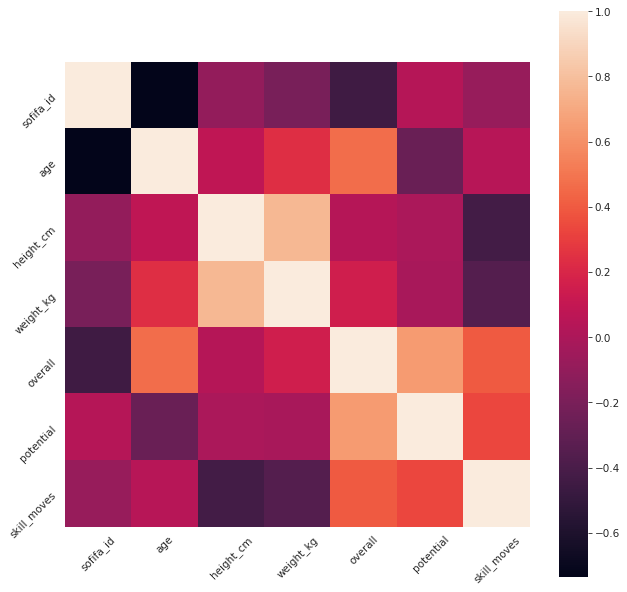

In [7]:
#melihat korelasi antar data
mpl.rcParams['figure.dpi'] = 75
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
# ax.set_xticklabels(rotation=30)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [9]:
clus = pd.DataFrame(dataset, columns=['overall', 'potential'])
clus

,overall,potential
0,94,94
1,93,93
2,92,92
3,91,93
4,91,91
...,...,...
18273,48,56
18274,48,56
18275,48,56
18276,48,54


In [0]:
#menyimpan dataset Clustering
clus.to_csv("clustering.csv", index = False)

In [0]:
#memilih daari dataset yang dimiliki, yang diambil kolom ke 4(overall) dan 5(potential)
X = data.iloc[:, [4,5]].values

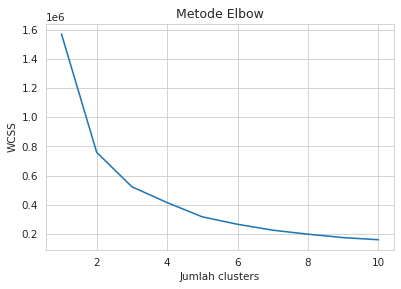

In [13]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
#perintah looping
for i in range(1, 11):
#perintah kmeans diikuti jumlah cluster, parameter init, parameter random state
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    km.fit(X)
#algoritma wcss ditulis seperti ini 
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS') 
plt.show()

pada gambar diatas hasil dari bentuk elbow pada saat k = 2 dan k = 3.

In [0]:
# Menjalankan K-Means Clustering ke data
#melakukan prediksi sepertiapa pengelompokan klusternya jika kita memilih k=3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

menampikan hasil clusteringnya

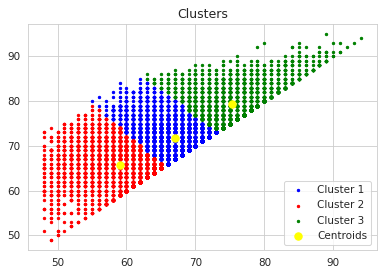

In [15]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 5, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 5, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

kesimpulan
Melalui gambar di atas bisa dilihat pembagian data points ke dalam kluster yang sangat rapi, di mana terlihat semua data points masuk ke dalam kluster masing-masing